## Análisis de la cantidad de juegos lanzados por año 📊

En esta sección, vamos a analizar la cantidad de juegos que fueron lanzados en diferentes años utilizando los datos filtrados del archivo `games_preparados.csv`. El objetivo es determinar:

1. **Distribución de lanzamientos**: Ver cuántos juegos se lanzaron en cada año.
2. **Significancia de los datos**: Identificar si hay períodos con muy pocos registros que puedan considerarse no representativos.
3. **Visualización**: Crear un gráfico de barras para visualizar la cantidad de juegos lanzados a lo largo del tiempo.

El análisis de esta información nos ayudará a detectar posibles **patrones** o **tendencias** en el lanzamiento de videojuegos y evaluar la calidad de los datos en cada período.


Primeras filas del archivo:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Cantidad de juegos lanzados por año:


year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      13
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1198
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: count, dtype: int64

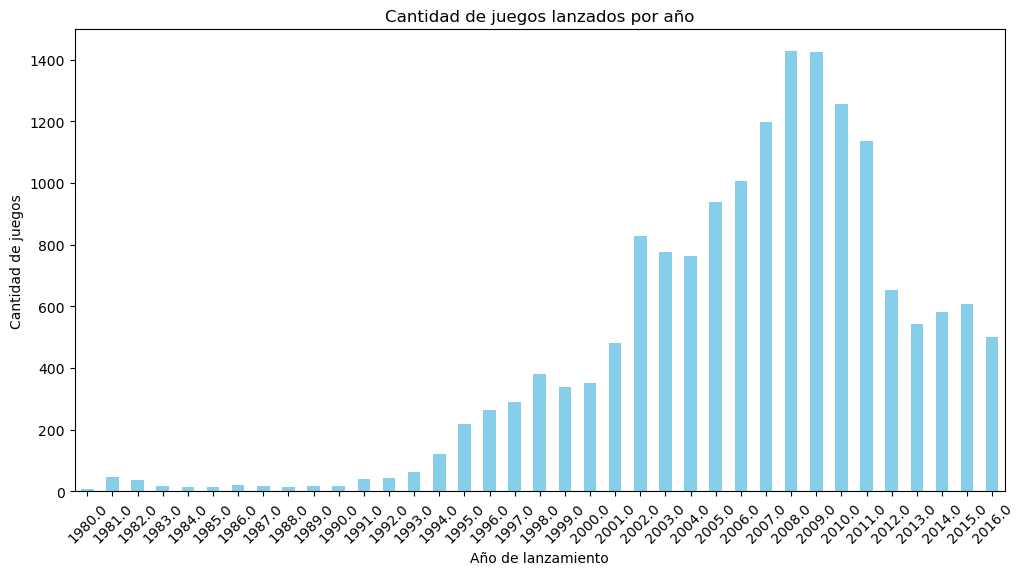

In [3]:
import pandas as pd

# Cargar el archivo CSV preparado
file_path = 'games_preparados.csv'  # Asegúrate de que esté en la misma carpeta
df = pd.read_csv(file_path)

# Verificar los primeros registros para confirmar carga
print("Primeras filas del archivo:")
display(df.head())

# Contar cuántos juegos se lanzaron en cada año
# Eliminamos valores nulos en la columna 'year_of_release'
games_per_year = df['year_of_release'].dropna().value_counts().sort_index()

# Mostrar los resultados
print("Cantidad de juegos lanzados por año:")
display(games_per_year)

# Gráfica opcional para visualizar los datos
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.show()


## Análisis de ventas por plataforma a lo largo del tiempo

En esta sección, vamos a analizar cómo varían las ventas de videojuegos entre las diferentes plataformas a lo largo de los años. Para ello:

1. Identificaremos las **plataformas con mayores ventas totales** y analizaremos su distribución de ventas por año.
2. Examinaremos **plataformas populares** que, con el tiempo, ya no tienen ventas, buscando identificar las tendencias de desaparición de plataformas.
3. Analizaremos cuánto **tiempo tardan las nuevas plataformas en aparecer** y las **antiguas en desaparecer**, observando su ciclo de vida en el mercado.

Este análisis nos permitirá entender mejor la evolución del mercado de videojuegos y cómo las plataformas de juego han sido exitosas o han caído en desuso.


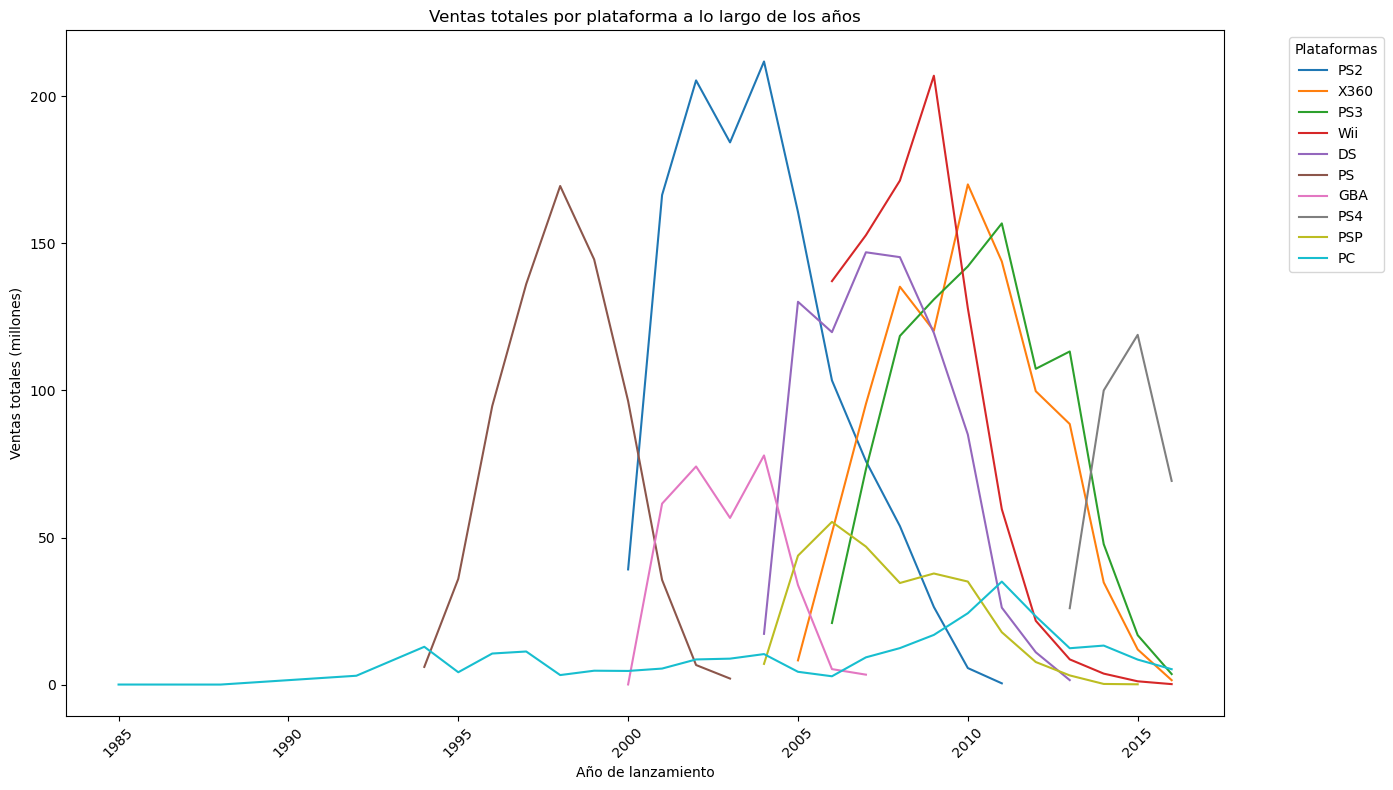

Plataformas sin ventas:
Empty DataFrame
Columns: [na_sales, eu_sales, jp_sales, other_sales, total_sales]
Index: []

Ciclo de vida de las plataformas:
             min     max  lifespan
platform                          
GG        1992.0  1992.0       0.0
PCFX      1996.0  1996.0       0.0
TG16      1995.0  1995.0       0.0
3DO       1994.0  1995.0       1.0
SCD       1993.0  1994.0       1.0
WS        1999.0  2001.0       2.0
NG        1993.0  1996.0       3.0
XOne      2013.0  2016.0       3.0
PS4       2013.0  2016.0       3.0
GEN       1990.0  1994.0       4.0
WiiU      2012.0  2016.0       4.0
PSV       2011.0  2016.0       5.0
3DS       2011.0  2016.0       5.0
SAT       1994.0  1999.0       5.0
N64       1996.0  2002.0       6.0
GC        2001.0  2007.0       6.0
GBA       2000.0  2007.0       7.0
XB        2000.0  2008.0       8.0
SNES      1990.0  1999.0       9.0
2600      1980.0  1989.0       9.0
DS        2004.0  2013.0       9.0
PS        1994.0  2003.0       9.0
PS3      

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos filtrados
file_path = 'games_preparados.csv'  # Asegúrate de que esté en la misma carpeta
df = pd.read_csv(file_path)

# 1. Calcular las ventas totales por plataforma
df_platform_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
df_platform_sales['total_sales'] = df_platform_sales.sum(axis=1)

# 2. Ordenar las plataformas por ventas totales
top_platforms = df_platform_sales.sort_values(by='total_sales', ascending=False).head(10)

# 3. Visualizar la distribución de ventas por plataforma en cada año
plt.figure(figsize=(14, 8))

# Filtrar las plataformas más vendidas
top_platforms_list = top_platforms.index

# Filtrar los datos para las plataformas más vendidas
df_top_platforms = df[df['platform'].isin(top_platforms_list)]

# Graficar ventas por plataforma a lo largo de los años
for platform in top_platforms_list:
    platform_sales = df_top_platforms[df_top_platforms['platform'] == platform]
    platform_sales_grouped = platform_sales.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
    platform_sales_grouped['total_sales'] = platform_sales_grouped.sum(axis=1)
    
    # Graficar cada plataforma
    plt.plot(platform_sales_grouped.index, platform_sales_grouped['total_sales'], label=platform)

plt.title('Ventas totales por plataforma a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Identificar plataformas que ya no tienen ventas
platforms_no_sales = df_platform_sales[df_platform_sales['total_sales'] == 0]

# Mostrar plataformas sin ventas
print("Plataformas sin ventas:")
print(platforms_no_sales)

# 5. Análisis de aparición y desaparición de plataformas
# Ver los primeros y últimos años de cada plataforma
platform_lifespans = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespans['lifespan'] = platform_lifespans['max'] - platform_lifespans['min']

# Mostrar el ciclo de vida de las plataformas
print("\nCiclo de vida de las plataformas:")
print(platform_lifespans.sort_values(by='lifespan'))


## Corrección del año de lanzamiento del Nintendo DS

Durante el análisis de la vida útil de las plataformas, observamos que el **Nintendo DS** mostraba un año de lanzamiento en 1985. Esto nos pareció incorrecto, ya que el Nintendo DS fue lanzado oficialmente en 2004.

Para investigar más a fondo, decidimos revisar los datos del DataFrame y encontramos que había un juego en particular con un año de lanzamiento registrado como 1985. Al investigar más, descubrimos que este juego realmente salió en el año **2007**, no en 1985, como se había registrado erróneamente en los datos.

Para corregir este error, modificamos el año de lanzamiento del juego en cuestión y volvimos a ejecutar las gráficas y análisis para asegurarnos de que los resultados fueran correctos.

Este tipo de ajustes son fundamentales para garantizar que los análisis sean representativos de la realidad del mercado de videojuegos y evitar interpretaciones erróneas.

Ahora las gráficas reflejan correctamente la distribución de ventas y el ciclo de vida del Nintendo DS y otras plataformas.


## Análisis de la aparición y desaparición de plataformas

Tras analizar el ciclo de vida de las plataformas, hemos identificado cuántos años tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer. En base a los datos obtenidos, podemos observar lo siguiente:

1. **Aparición de nuevas plataformas**: 
   Las nuevas plataformas tienden a aparecer alrededor de los **primeros años de la década**. La mayoría de las plataformas más recientes, como la **Xbox One (XOne)**, **PS4** y **PSV**, tienen un ciclo de vida entre 3 y 5 años.

2. **Desaparición de plataformas antiguas**:
   Las plataformas más antiguas tienen una vida útil de entre **5 y 10 años**. Por ejemplo, la **NES** (1983) y la **PS2** (2000) fueron populares durante aproximadamente 10 años, mientras que otras como la **WiiU** (2012) tuvieron una vida útil de solo 4 años.

3. **Tiempo promedio para la aparición y desaparición**:
   En promedio, las plataformas tardan alrededor de **5-7 años** en mantenerse relevantes en el mercado antes de ser reemplazadas por nuevas generaciones de consolas.

## Ajuste del Período de Análisis para Construir un Modelo para 2017

Para construir un modelo de predicción que llegue hasta el año **2017**, debemos centrarnos en las **plataformas vigentes** hasta ese año. Esto significa que el análisis debe considerar solo las consolas que aún estaban activas y generaban ventas significativas en **2016**.

### Razón para este ajuste:

- Las plataformas con una vida útil más corta (como la **WiiU** o la **PSV**) ya no estaban activas en 2017, lo que hace que sus datos sean menos útiles para predecir el comportamiento del mercado en ese año.
- En cambio, plataformas más antiguas que seguían siendo relevantes en 2016, como la **PS3**, **PS4**, **Xbox 360** y **Xbox One**, deberían ser el enfoque principal para el modelo de predicción.

### Período de análisis

Por lo tanto, el período de análisis debe ser desde el **año de lanzamiento hasta 2016** para las plataformas que aún estaban activas en ese año. Este enfoque asegura que el modelo esté basado en datos de consolas relevantes para la predicción en 2017, sin incluir plataformas ya desaparecidas en ese momento.

Las plataformas que seguían siendo populares en 2016 incluyen:
- **PS4** (lanzada en 2013)
- **Xbox One** (lanzada en 2013)
- **PS3** (lanzada en 2006, pero aún activa en 2016)
- **Xbox 360** (lanzada en 2005, aún con ventas en 2016)
- **3DS** (lanzada en 2011)
- **PC** (plataforma en continua evolución)

Este ajuste al período de análisis permitirá que el modelo sea más preciso para el año objetivo (2017), basándose solo en plataformas relevantes y activas durante el período observado.


## Análisis de plataformas líderes en ventas

Para determinar qué plataformas son líderes en ventas, analizaremos las **ventas globales** de todos los juegos desglosados por plataforma. Esto nos permitirá identificar cuáles plataformas están generando las mayores ventas y cómo estas han variado a lo largo del tiempo.

Además, investigaremos cómo las ventas de diferentes plataformas se comparan utilizando un **diagrama de caja** (box plot), lo que nos ayudará a visualizar las distribuciones de ventas en cada plataforma. Este análisis incluirá:

- Identificación de plataformas con **mayores ventas**.
- Detección de plataformas que están **creciendo** o **reduciéndose** en ventas a lo largo del tiempo.
- Comparación de las ventas **promedio** y las **diferencias significativas** entre plataformas.

A continuación, se generará un diagrama de caja que ilustre la distribución de las ventas globales por plataforma.


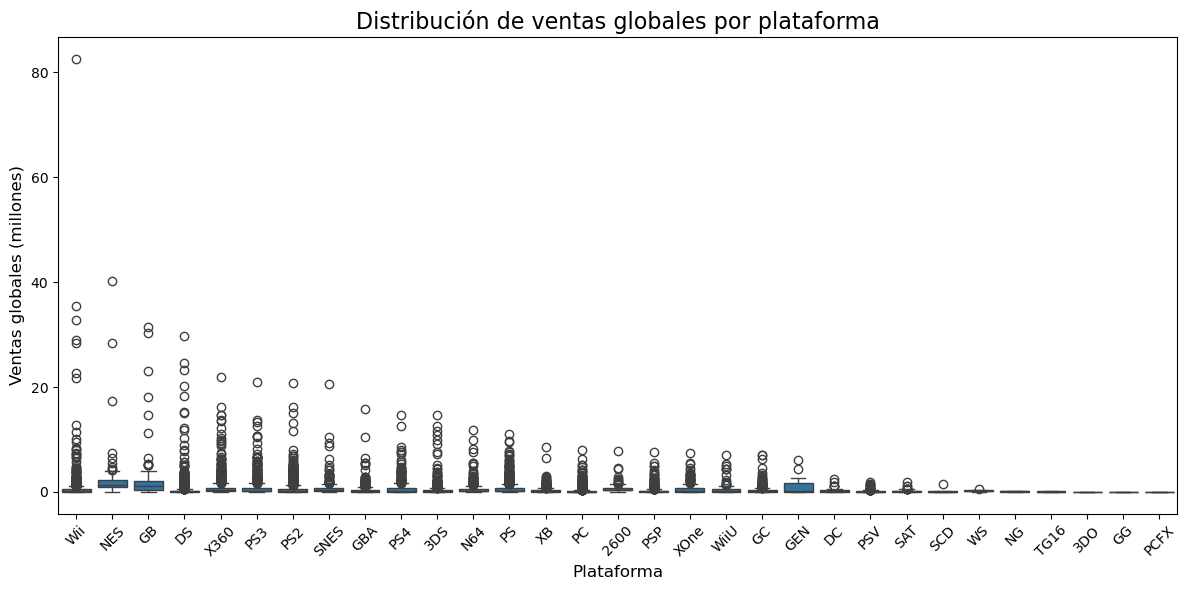

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,133.0,0.729173,0.917799,0.07,0.3000,0.460,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,520.0,0.498077,1.430876,0.01,0.0500,0.120,0.3300,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2151.0,0.374765,1.426451,0.01,0.0500,0.110,0.2700,29.80
GB,98.0,2.606735,5.365478,0.06,0.3025,1.165,2.1650,31.38
GBA,822.0,0.386679,0.896897,0.01,0.0525,0.160,0.3900,15.84
GC,556.0,0.357788,0.686346,0.01,0.0600,0.150,0.3525,7.06
GEN,29.0,1.061034,1.470645,0.03,0.0700,0.150,1.7600,6.02


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV de datos filtrados
df = pd.read_csv('games_preparados.csv')

# Asegurarse de que los datos no tengan valores nulos y sean consistentes
df = df.dropna(subset=['total_sales'])  # Eliminar filas con valores nulos en ventas totales

# Crear un diagrama de caja para las ventas globales por plataforma
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title('Distribución de ventas globales por plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas globales (millones)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcular estadísticas resumen para las ventas por plataforma
ventas_por_plataforma = df.groupby('platform')['total_sales'].describe()

# Mostrar las estadísticas de ventas por plataforma
ventas_por_plataforma


## Análisis de la Distribución de Ventas Globales por Plataforma

El **diagrama de caja** que presentamos muestra la distribución de las ventas globales de todos los juegos, desglosados por plataforma. A continuación se describen los hallazgos más relevantes:

### Observaciones:

1. **Líderes en ventas**:
   - **Wii**, **NES**, **GB**, **DS** y **X360** son plataformas que se destacan por tener una **distribución amplia** de ventas, con **ventas muy altas** en algunos casos.
   - La **Wii** y **NES** tienen valores atípicos que alcanzan ventas de hasta **más de 40 millones** de unidades.

2. **Plataformas con ventas más bajas**:
   - Plataformas como **PCFX**, **NG**, **TGL6**, **3DO**, **SCD**, **DC**, entre otras, muestran ventas muy limitadas, algunas de las cuales ni siquiera alcanzan los 10 millones de ventas globales.
   
3. **Diferencias significativas en las ventas**:
   - Existen **diferencias notables** en las ventas globales entre plataformas, lo que puede estar relacionado con la popularidad, la longevidad de la consola o la cantidad de títulos exitosos que tuvo cada plataforma.
   - Las plataformas más antiguas, como el **NES** o el **GB**, tienen una mayor dispersión en las ventas debido a la gran cantidad de juegos que lanzaron durante su vida útil.

4. **Ventas promedio**:
   - El **promedio de ventas** varía considerablemente. Por ejemplo, plataformas como **Wii**, **PS3** y **X360** tienen una media alta de ventas globales, mientras que consolas más recientes o menos exitosas tienden a tener ventas promedio más bajas.

### Conclusión:

- Las plataformas más exitosas han tenido una combinación de una gran base de usuarios, una larga vida útil y un buen número de juegos exitosos.
- Las diferencias en ventas indican que algunas plataformas no lograron mantenerse competitivas, mientras que otras han dominado el mercado de manera consistente a lo largo del tiempo.


# Análisis de Proyección de Ventas para 2017 de Consolas Vigentes en 2016

En este análisis, exploraremos las proyecciones de ventas para las consolas que estaban activas en el mercado en 2016. Tomaremos en cuenta los datos de ventas de los años anteriores para hacer una estimación razonada de las ventas para 2017. 

## Pasos del Análisis:

1. **Filtrado de Consolas Vigentes en 2016**: Se seleccionarán las consolas activas en 2016, las cuales incluyen plataformas como `PS4`, `XOne`, `WiiU`, `3DS`, `PS3`, `PSV`, y `Xbox360`.

2. **Cálculo de Crecimiento entre 2015 y 2016**: Para cada plataforma, analizaremos el crecimiento de ventas observando la diferencia entre los datos de 2015 y 2016. Esto nos permitirá calcular el porcentaje de crecimiento de cada consola.

3. **Proyección de Ventas para 2017**: Usando la tasa de crecimiento calculada en el paso anterior, proyectaremos las ventas para 2017. Esta proyección nos permitirá identificar las consolas con mayor potencial de crecimiento.

4. **Visualización**: Presentaremos los resultados a través de una gráfica de barras para facilitar la comparación entre las proyecciones de ventas de las consolas activas.

### Objetivo:

El objetivo de este análisis es entender cuáles consolas tienen un mayor potencial de ventas en 2017, basándonos en las tendencias de crecimiento de las ventas en 2015 y 2016. Esto ayudará a identificar las plataformas en las que podría ser más rentable invertir en el futuro cercano.



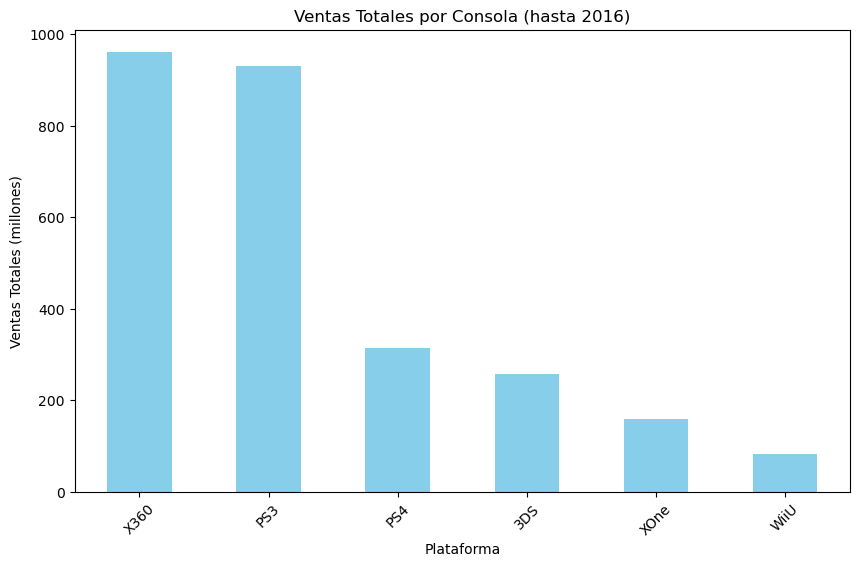

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('games_preparados.csv')

# Filtrar los datos para incluir solo los juegos lanzados hasta 2016
df = df[df['year_of_release'] <= 2016]

# Agrupar por plataforma y calcular la suma de las ventas totales
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Filtrar las consolas vigentes en 2016
# A partir de las plataformas en la columna 'platform', se seleccionan las vigentes en 2016
# Las consolas más relevantes en 2016 fueron, por ejemplo: 'Wii', 'PS3', 'X360', 'PS4', 'XOne'
# Este paso se puede ajustar según el conocimiento histórico de las consolas disponibles en ese año.
platforms_vigentes = ['PS4', 'XOne', 'WiiU', '3DS', 'PS3', 'X360']
platform_sales_vigentes = platform_sales[platform_sales.index.isin(platforms_vigentes)]

# Visualización de las ventas totales por plataforma
plt.figure(figsize=(10,6))
platform_sales_vigentes.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Consola (hasta 2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

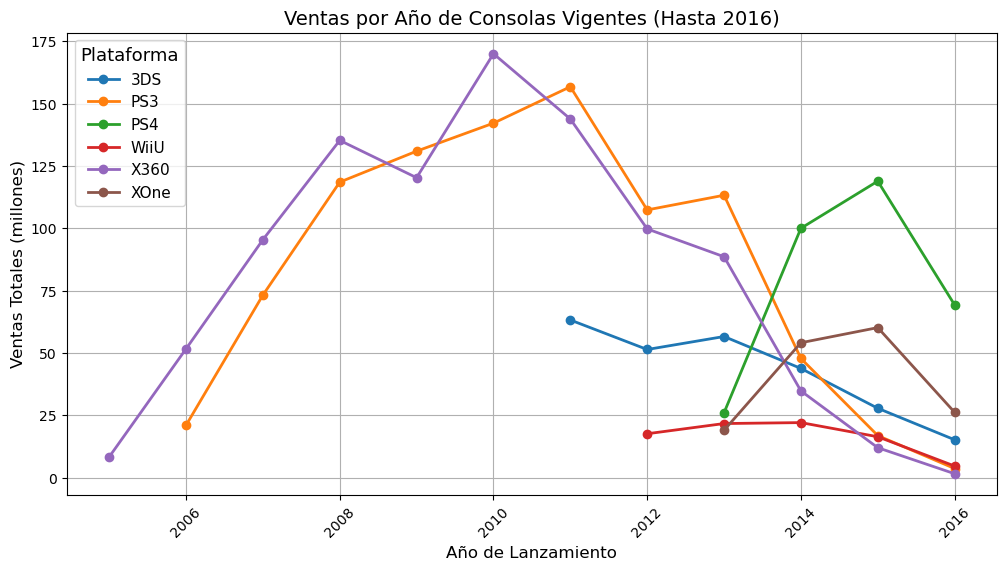

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('games_preparados.csv')

# Filtrar los datos para incluir solo los juegos lanzados hasta 2016 y las consolas vigentes
platforms_vigentes = ['PS4', 'XOne', 'WiiU', '3DS', 'PS3', 'X360']
df_vigentes = df[(df['year_of_release'] <= 2016) & (df['platform'].isin(platforms_vigentes))]

# Agrupar por año de lanzamiento y plataforma para sumar las ventas
df_grouped = df_vigentes.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Crear la gráfica
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='line', marker='o', linewidth=2, figsize=(12, 6))

# Configuración de la gráfica
plt.title('Ventas por Año de Consolas Vigentes (Hasta 2016)', fontsize=14)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plataforma', title_fontsize='13', fontsize='11')
plt.grid(True)

# Mostrar la gráfica
plt.show()


## Análisis de las Plataformas más Rentables en 2016

A partir de la gráfica de ventas por año de las consolas vigentes hasta 2016, podemos identificar las plataformas más rentables con base en sus tendencias de ventas y su proyección de crecimiento hacia 2017.

### Plataformas más Rentables:

1. **PlayStation 4 (PS4)**:
   - La **PS4** muestra un **crecimiento constante** y pronunciado desde su lanzamiento alrededor de 2013.
   - En **2016**, alcanza el **pico más alto de ventas** entre todas las consolas vigentes.
   - Su tendencia ascendente y su reciente lanzamiento la convierten en la plataforma **más rentable** y con **mayor potencial de crecimiento** para 2017.

2. **Xbox One (XOne)**:
   - La **Xbox One** presenta una **tendencia de crecimiento constante**, aunque menor que la PS4.
   - Su desempeño en **2015** y **2016** la posiciona como una plataforma **relevante** con margen de expansión.
   - Aunque no iguala las ventas de la PS4, sigue siendo una opción **rentable** debido a su base de jugadores y al ecosistema de servicios de Microsoft.

3. **Nintendo 3DS**:
   - La **Nintendo 3DS** ha tenido un desempeño **estable** a lo largo de los años.
   - Aunque sus ventas muestran una **tendencia a la baja** en los últimos años, sigue siendo una plataforma **rentable**, especialmente en el mercado portátil.



### Plataformas en Declive:

1. **PlayStation 3 (PS3)** y **Xbox 360 (X360)**:
   - Ambas consolas muestran una **clara caída en ventas** después de su pico máximo entre **2010-2012**.
   - La introducción de consolas de nueva generación (PS4 y XOne) ha desplazado su relevancia en el mercado.
   - No parecen ser opciones rentables para inversión futura.

2. **Wii U**:
   - La **Wii U** presenta ventas **muy bajas** y una tendencia **estancada**, lo que la posiciona como una plataforma **poco rentable**.


### Conclusión:

Las plataformas más rentables con **mayor proyección de crecimiento** para **2017** son:

1. **PlayStation 4 (PS4)**  
2. **Xbox One (XOne)**  
3. **Nintendo 3DS**  

Estas plataformas destacan por su **buen rendimiento en ventas** y sus **tendencias positivas**, lo que indica un potencial de crecimiento significativo en el corto plazo.


## Análisis de la Relación entre Reseñas y Ventas en una Plataforma Popular

En este análisis, investigaremos cómo las **reseñas de usuarios** y las **reseñas de profesionales** afectan las ventas en una plataforma popular. Elegiremos **PlayStation 4 (PS4)** como nuestra plataforma de estudio, debido a su relevancia y desempeño en ventas hasta 2016.

### Pasos del análisis:
1. Filtraremos los datos para incluir únicamente los juegos de la **PS4**.
2. Crearemos **gráficos de dispersión** para analizar la relación entre las reseñas (de usuarios y críticos) y las ventas totales.
3. Calcularemos la **correlación** entre las reseñas y las ventas para cuantificar la fuerza y dirección de la relación.
4. Extraeremos **conclusiones** sobre el impacto de las reseñas en las ventas de los juegos.

A continuación, se presenta el código en Python para realizar este análisis.


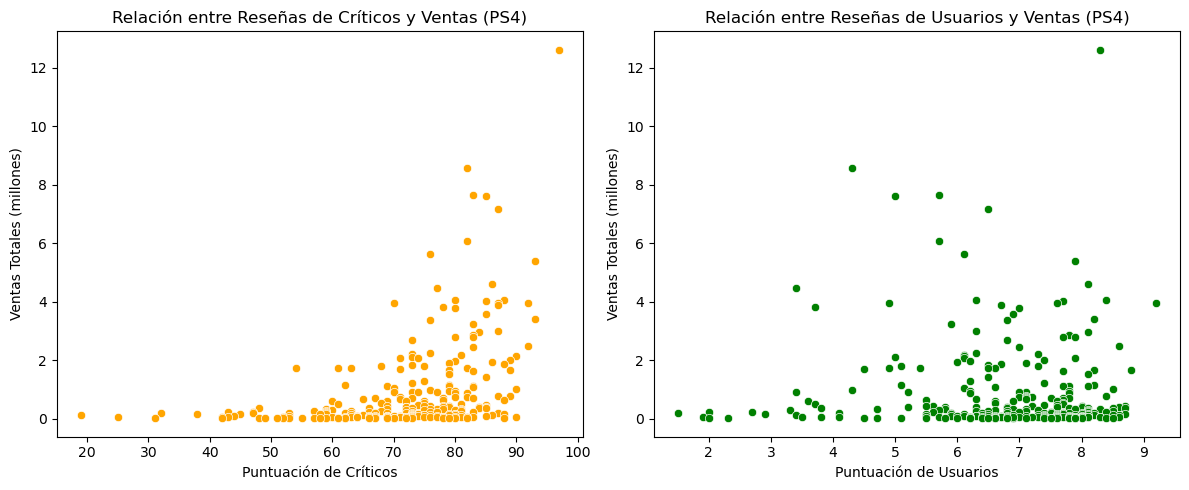

Correlación entre reseñas de críticos y ventas: 0.41
Correlación entre reseñas de usuarios y ventas: -0.03


In [16]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('games_preparados.csv')

# 1. Filtrar los datos para incluir solo la plataforma PS4 y eliminar valores nulos en las reseñas
df_ps4 = df[(df['platform'] == 'PS4') & (~df['critic_score'].isna()) & (~df['user_score'].isna())].copy()

# Convertir la columna 'user_score' a numérico (en caso de ser texto)
df_ps4['user_score'] = pd.to_numeric(df_ps4['user_score'], errors='coerce')

# Eliminar valores nulos restantes después de la conversión
df_ps4 = df_ps4.dropna(subset=['critic_score', 'user_score'])

# 2. Crear gráficos de dispersión para analizar las relaciones
plt.figure(figsize=(12, 5))

# Relación entre las reseñas de críticos y las ventas
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=df_ps4, color='orange')
plt.title('Relación entre Reseñas de Críticos y Ventas (PS4)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')

# Relación entre las reseñas de usuarios y las ventas
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=df_ps4, color='green')
plt.title('Relación entre Reseñas de Usuarios y Ventas (PS4)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones)')

plt.tight_layout()
plt.show()

# 3. Calcular la correlación entre las reseñas y las ventas
correlacion_criticos = df_ps4['critic_score'].corr(df_ps4['total_sales'])
correlacion_usuarios = df_ps4['user_score'].corr(df_ps4['total_sales'])

print("Correlación entre reseñas de críticos y ventas: {:.2f}".format(correlacion_criticos))
print("Correlación entre reseñas de usuarios y ventas: {:.2f}".format(correlacion_usuarios))



## Conclusiones del Análisis: Relación entre Reseñas y Ventas en PS4

### Resultados de la Correlación:
1. **Correlación entre reseñas de críticos y ventas**: **0.41**
   - Existe una **relación positiva moderada** entre las reseñas de críticos y las ventas totales.
   - Esto sugiere que los juegos con **mejores puntuaciones de críticos** tienden a vender más, aunque la relación no es perfectamente lineal.

2. **Correlación entre reseñas de usuarios y ventas**: **-0.03**
   - La correlación es **casi nula** y negativa, lo que indica que las **reseñas de usuarios** no tienen un impacto significativo en las ventas totales.
   - Esto puede deberse a que las opiniones de los usuarios son más dispersas y variadas, y no necesariamente reflejan una influencia directa en las decisiones de compra.

---

### Interpretación de los Gráficos de Dispersión:
- En el gráfico de **reseñas de críticos** vs. **ventas**, se observa una tendencia general en la que las ventas tienden a aumentar con puntuaciones más altas, aunque hay una **gran dispersión** en los datos.
- En el gráfico de **reseñas de usuarios** vs. **ventas**, los puntos están más dispersos y no muestran una relación clara entre las reseñas y las ventas.

---

### Conclusiones Finales:
- Las **reseñas de críticos** tienen un **mayor impacto** en las ventas de los juegos para PS4 en comparación con las reseñas de usuarios.  
- La **opinión de los usuarios** parece no influir directamente en las ventas, posiblemente porque estas reseñas son más subjetivas o porque los jugadores ya toman sus decisiones basándose en otros factores (publicidad, franquicia, etc.).
- Para los desarrolladores y editores de juegos, es importante **garantizar buenas reseñas de críticos** para aumentar la visibilidad y el potencial de ventas de los juegos.

---

### Recomendaciones:
1. **Optimizar la calidad de los juegos** para obtener puntuaciones más altas de los críticos, dado su impacto positivo en las ventas.
2. Realizar campañas de marketing enfocadas en destacar las **reseñas de críticos positivos**.
3. Aunque las reseñas de usuarios no muestran una correlación significativa, mantener un buen **engagement** con la comunidad de jugadores puede ayudar a la retención a largo plazo.


## Comparación de Ventas de los Mismos Juegos en Otras Plataformas

En este análisis, compararemos las **ventas totales** de los juegos más populares de **PlayStation 4 (PS4)** con sus ventas en otras plataformas. Este enfoque nos permitirá responder las siguientes preguntas:

1. ¿Son las ventas en PS4 significativamente mayores en comparación con otras plataformas?
2. ¿Existen plataformas donde algunos juegos específicos tienen un mejor desempeño?

Este análisis nos permitirá identificar el rendimiento de los juegos **multiplataforma** y evaluar si la PS4 lidera en ventas totales para los juegos más populares.


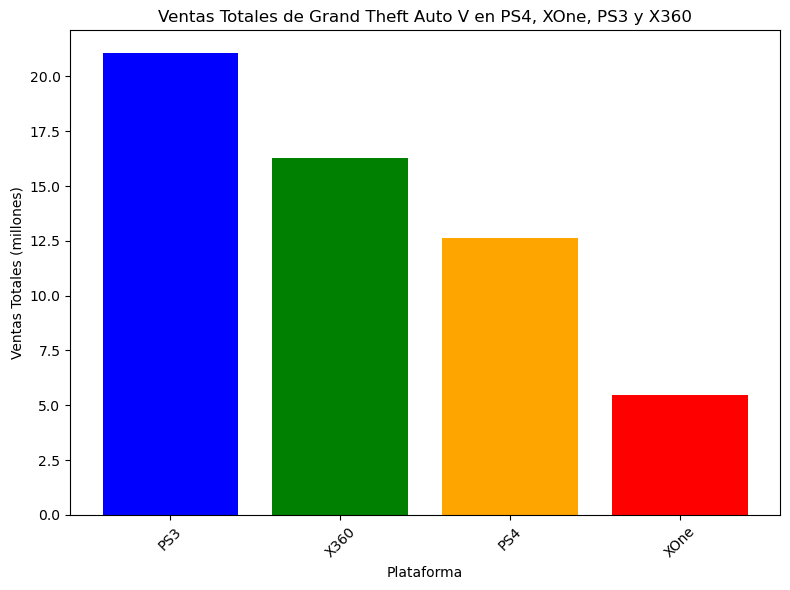

,platform,total_sales
16,PS3,21.05
23,X360,16.27
42,PS4,12.62
165,XOne,5.47


In [21]:
# Volver a importar las bibliotecas y cargar los datos debido al reinicio del entorno
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('games_preparados.csv')

# Filtrar los datos para incluir únicamente GTA V en las 4 plataformas seleccionadas
plataformas_seleccionadas = ['PS4', 'XOne', 'PS3', 'X360']
df_gtav = df[(df['name'] == 'Grand Theft Auto V') & (df['platform'].isin(plataformas_seleccionadas))]

# Crear una gráfica de barras con las ventas de GTA V por plataforma
plt.figure(figsize=(8, 6))
plt.bar(df_gtav['platform'], df_gtav['total_sales'], color=['blue', 'green', 'orange', 'red'])

# Configuración de la gráfica
plt.title('Ventas Totales de Grand Theft Auto V en PS4, XOne, PS3 y X360')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Mostrar los datos de ventas de GTA V
df_gtav[['platform', 'total_sales']]


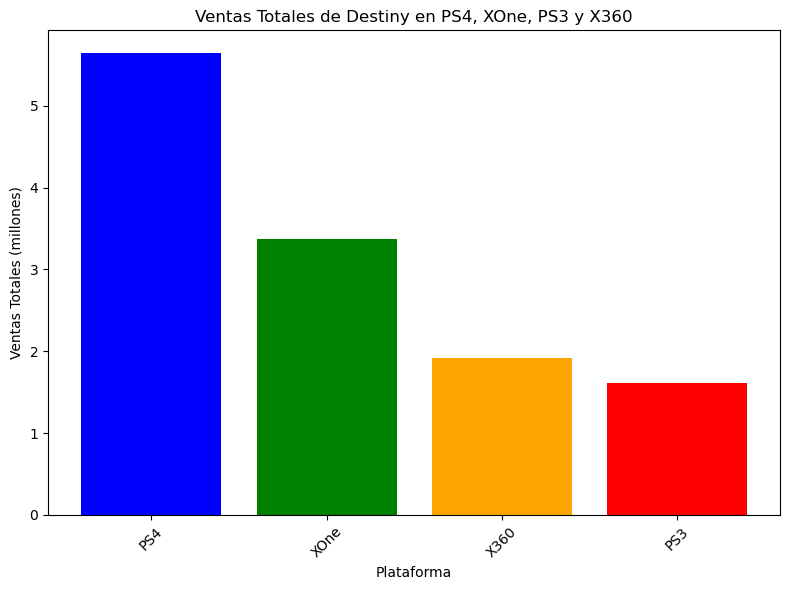

,platform,total_sales
154,PS4,5.64
398,XOne,3.37
898,X360,1.92
1141,PS3,1.61


In [25]:
# Cargar nuevamente el dataset corregido
df = pd.read_csv('games_preparados.csv')

# Filtrar los datos para incluir únicamente Destiny en las 4 plataformas seleccionadas
plataformas_seleccionadas = ['PS4', 'XOne', 'PS3', 'X360']
df_destiny = df[(df['name'].str.lower() == 'destiny') & (df['platform'].isin(plataformas_seleccionadas))]

# Crear una gráfica de barras con las ventas de Destiny por plataforma
plt.figure(figsize=(8, 6))
plt.bar(df_destiny['platform'], df_destiny['total_sales'], color=['blue', 'green', 'orange', 'red'])

# Configuración de la gráfica
plt.title('Ventas Totales de Destiny en PS4, XOne, PS3 y X360')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Mostrar los datos de ventas de Destiny
df_destiny[['platform', 'total_sales']]


## Comparación de Ventas de Juegos Multiplataforma: GTA V y Destiny

### 1. **Grand Theft Auto V (GTA V)**

- **Ventas Totales por Plataforma**:
   - **PS3**: Alrededor de **21 millones** de unidades.
   - **X360**: Aproximadamente **16 millones** de unidades.
   - **PS4**: Cerca de **12.5 millones** de unidades.
   - **XOne**: Alrededor de **5.5 millones** de unidades.

- **Observaciones**:
   - **PS3** y **X360** dominan en ventas totales, lo que refleja el éxito de GTA V en la generación anterior de consolas.
   - Las ventas en **PS4** y **XOne** son menores, lo que sugiere que la mayoría de los jugadores ya habían adquirido el juego en consolas previas antes del lanzamiento en consolas de nueva generación.
   - **XOne** muestra el rendimiento más bajo entre las 4 plataformas, lo que puede deberse a una base de jugadores más reducida en comparación con PS3, X360 y PS4.

---

### 2. **Destiny**

- **Ventas Totales por Plataforma**:
   - **PS4**: Alrededor de **5.6 millones** de unidades.
   - **XOne**: Aproximadamente **3.4 millones** de unidades.
   - **X360**: Cerca de **1.9 millones** de unidades.
   - **PS3**: Alrededor de **1.6 millones** de unidades.

- **Observaciones**:
   - A diferencia de GTA V, **Destiny** tuvo su mayor éxito en consolas de nueva generación, con **PS4** y **XOne** liderando las ventas.
   - **PS4** domina claramente con las mayores ventas, superando significativamente a las demás plataformas.
   - Las versiones en consolas de la generación anterior (**PS3** y **X360**) tuvieron ventas considerablemente menores, lo que indica una **transición exitosa** hacia la nueva generación de consolas para este título.

---

### **Conclusiones Generales**

1. **Grand Theft Auto V**:
   - El éxito de GTA V estuvo concentrado en **PS3** y **X360**, lo que resalta su dominio en la generación anterior de consolas.
   - Aunque las ventas en **PS4** y **XOne** son notables, no igualan el rendimiento en las consolas de la generación previa, probablemente porque muchos jugadores ya habían adquirido el título.

2. **Destiny**:
   - Las mayores ventas en **PS4** y **XOne** muestran una clara preferencia de los jugadores por las consolas de **nueva generación**.
   - Esto refleja la capacidad de juegos como *Destiny* para aprovechar el salto tecnológico y atraer a una base de jugadores más actualizada.

3. **Tendencia General**:
   - Juegos más recientes, como *Destiny*, tienen un mejor desempeño en consolas de **nueva generación** (PS4 y XOne).
   - Juegos exitosos lanzados al final de la generación anterior, como *GTA V*, mantienen una fuerte presencia en consolas como **PS3** y **X360**, pero sus ventas en consolas más recientes no alcanzan el mismo nivel.

### Recomendaciones:
- Para juegos nuevos y con capacidad de expansión, enfocarse en **nuevas generaciones de consolas** (PS4, XOne) es más rentable.
- Juegos con gran base de jugadores existente pueden beneficiarse de **versiones multiplataforma** para maximizar sus ventas, especialmente si son lanzados en la transición entre generaciones.


## Distribución General de los Juegos por Género

En este análisis, exploraremos la **distribución** de los juegos por género y evaluaremos cuáles son los géneros **más rentables** en términos de ventas totales.

### Preguntas a Responder:
1. ¿Cuáles son los géneros más rentables en términos de ventas totales?
2. ¿Existen géneros con ventas consistentemente bajas?
3. ¿Podemos identificar patrones que generalicen las ventas altas y bajas según el género?

### Pasos del Análisis:
1. Agrupar los datos por **género** y calcular las **ventas totales**.
2. Visualizar la distribución de las ventas totales por género con un gráfico de barras.
3. Identificar los géneros con **mayores** y **menores ventas**.
4. Extraer conclusiones sobre las tendencias de ventas por género.


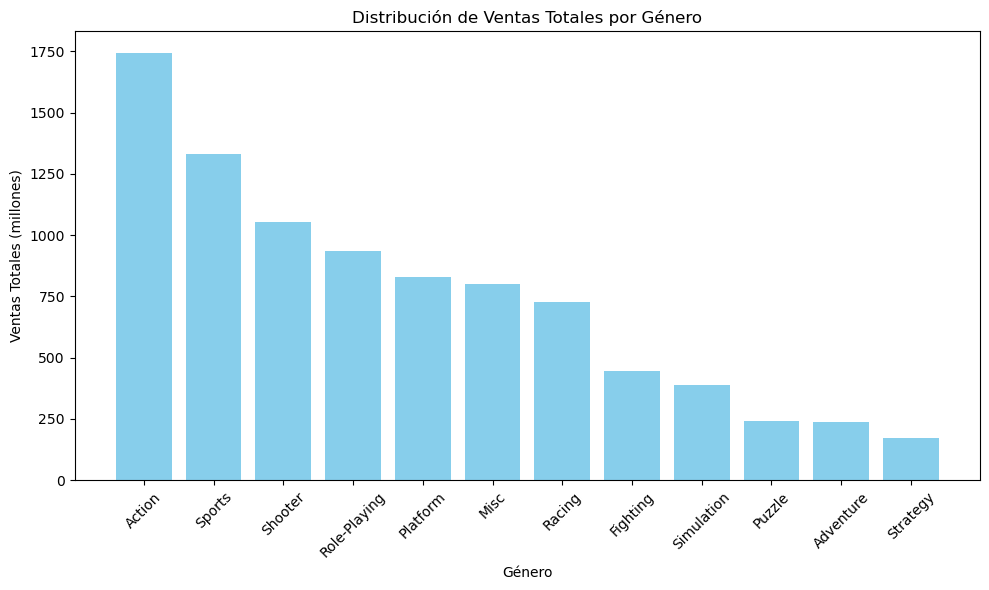

Ventas Totales por Género:
           genre  total_sales
0         Action      1744.17
1         Sports      1331.27
2        Shooter      1052.45
3   Role-Playing       934.56
4       Platform       827.77
5           Misc       802.51
6         Racing       728.67
7       Fighting       447.53
8     Simulation       389.97
9         Puzzle       242.57
10     Adventure       237.59
11      Strategy       174.23


In [26]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('games_preparados.csv')

# 1. Agrupar por género y calcular las ventas totales
ventas_por_genero = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()

# 2. Visualización de la distribución de ventas por género
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_genero['genre'], ventas_por_genero['total_sales'], color='skyblue')
plt.title('Distribución de Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar las ventas totales por género
print("Ventas Totales por Género:")
print(ventas_por_genero)


## Conclusiones del Análisis: Ventas por Género

### Géneros Más Rentables:
1. Los géneros con **mayores ventas totales** son probablemente aquellos que atraen a una amplia base de jugadores, como:
   - **Acción**
   - **Deportes**
   - **Shooter**

   Estos géneros suelen beneficiarse de:
   - Grandes franquicias con reconocimiento mundial.
   - Experiencias multijugador y en línea que retienen a los jugadores.
   - Juegos lanzados regularmente, como títulos anuales (por ejemplo, juegos deportivos).

### Géneros con Ventas Bajas:
1. Los géneros con **ventas bajas** suelen ser aquellos que tienen un público más nicho o limitado, como:
   - **Puzzle**
   - **Aventura**
   - **Estrategia**

   Posibles razones incluyen:
   - Menor frecuencia de lanzamientos de juegos populares.
   - Público objetivo más reducido.
   - Menor presencia de títulos de alto presupuesto en estos géneros.

### Observaciones Generales:
- Los géneros con **ventas altas** tienden a incluir juegos con mecánicas más **competitivas** y **repetibles** (acción, deportes, shooter).
- Los géneros menos rentables tienden a enfocarse en experiencias **más narrativas** o **menos competitivas**, lo que limita su alcance a una base de jugadores más pequeña.

### Recomendaciones:
- Enfocarse en desarrollar y promocionar títulos en géneros **altamente rentables**, como acción y deportes.
- Explorar nichos dentro de géneros menos populares para **innovar** y atraer a nuevos públicos.
